# AIPI 590 - XAI | Interpretable AI
### Understand a dataset and develop interpretable models to make predictions
### Mariam Khan

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/interpretable_ml_assignment/khan_interpretable_ml.ipynb)

In [ ]:
# Installs
!pip install kaggle
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install statsmodels

In [67]:
# Imports
from google.colab import userdata
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, classification_report

In [ ]:
# Set Kaggle credentials
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# Download dataset
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip -d telco_data

In [78]:
df = pd.read_csv('telco_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Clean data
df = df.drop(columns=['customerID'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

## **1. Exploratory Data Analysis to check Assumptions**
Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

####**Relationship between features and churn**

In [70]:
# Quick summary
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


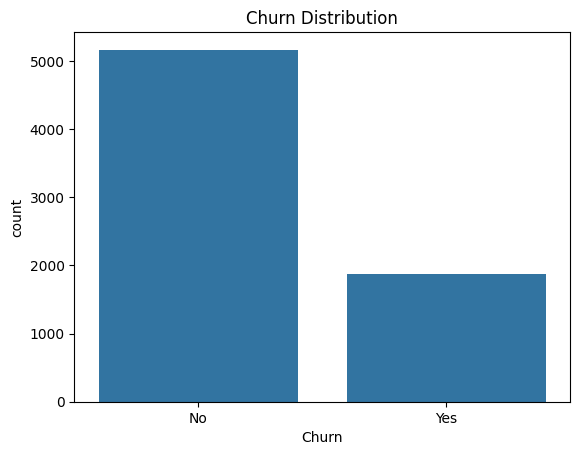

,proportion
Churn,
No,73.421502
Yes,26.578498


In [71]:
# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

df['Churn'].value_counts(normalize=True) * 100 # Calculate percentages

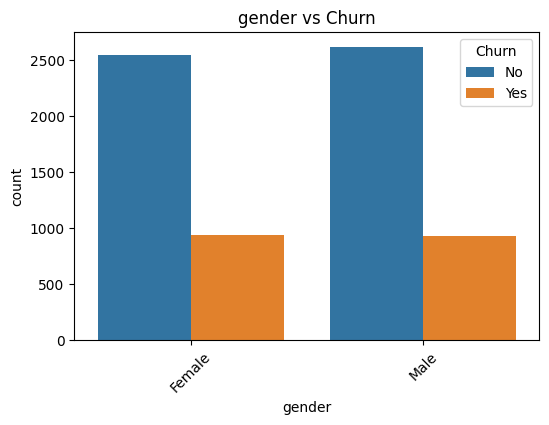

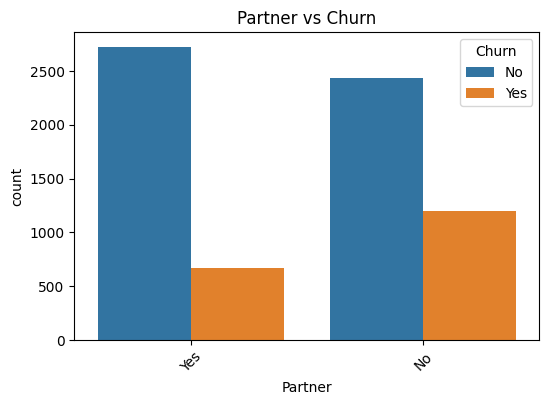

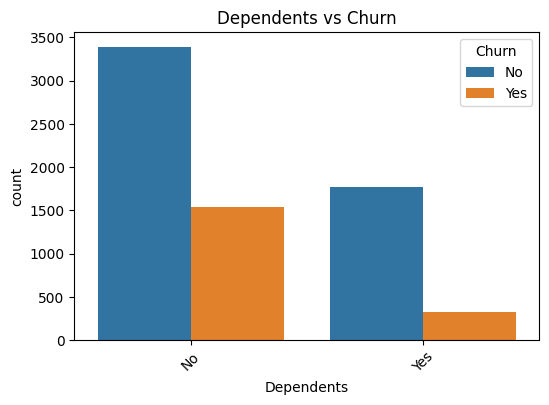

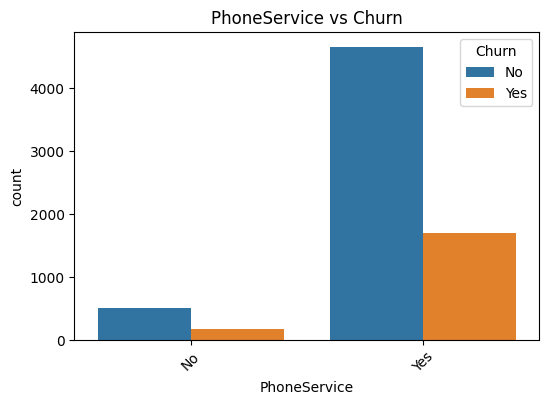

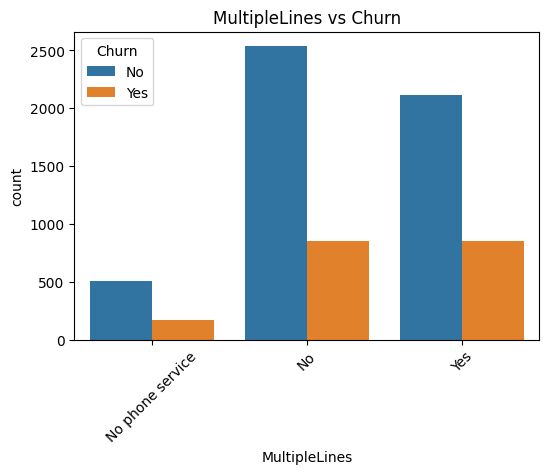

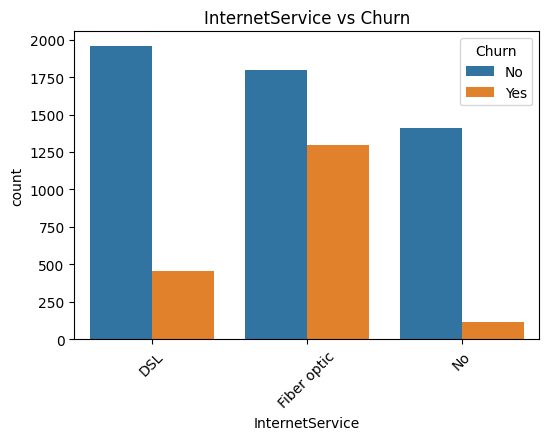

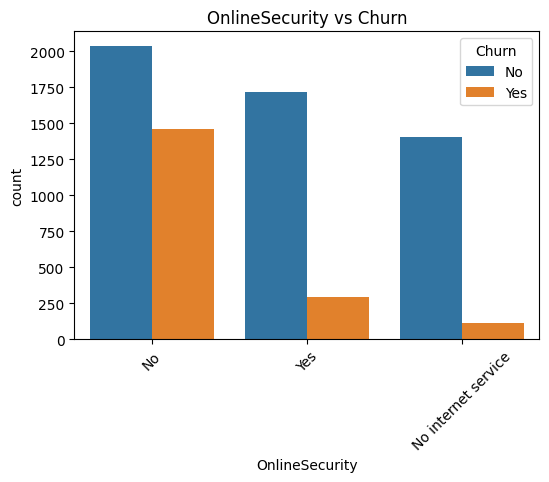

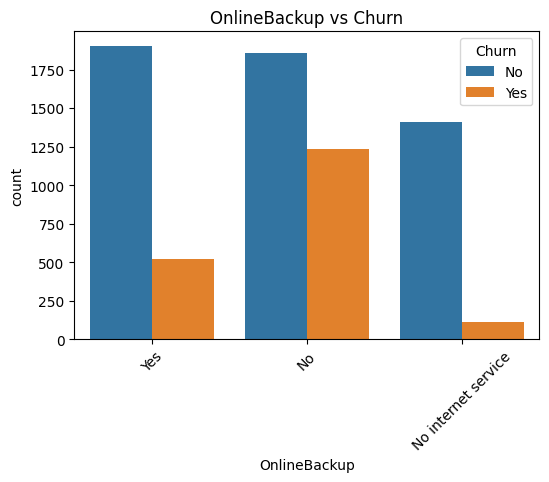

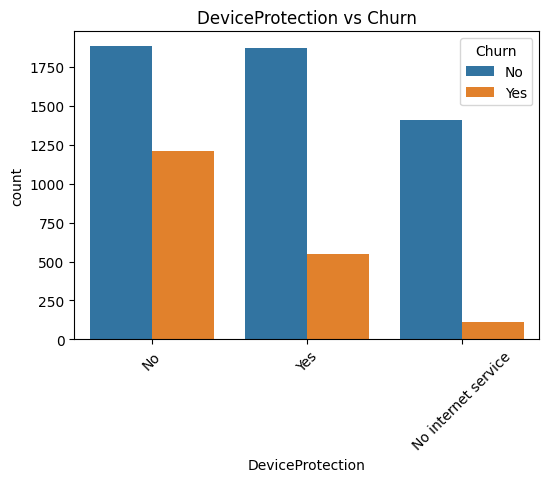

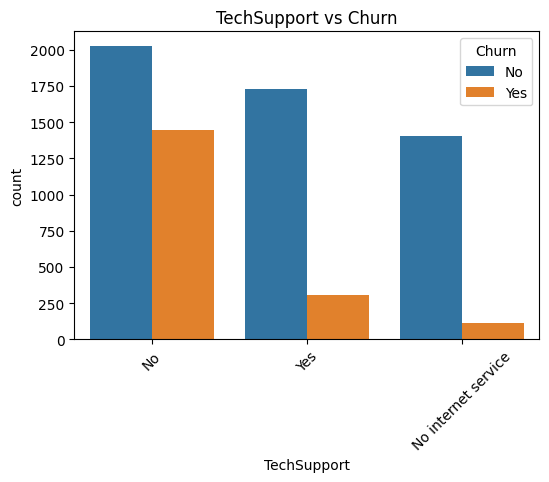

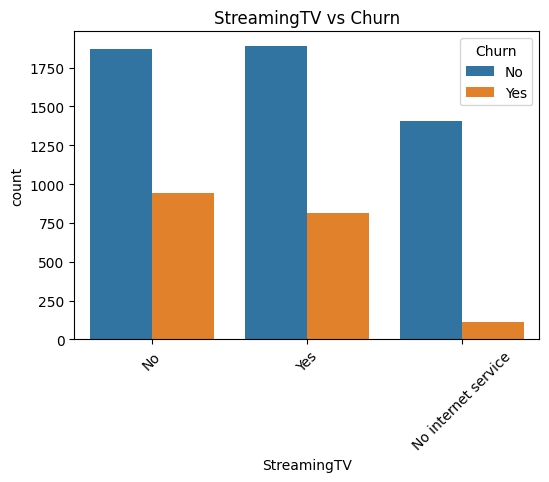

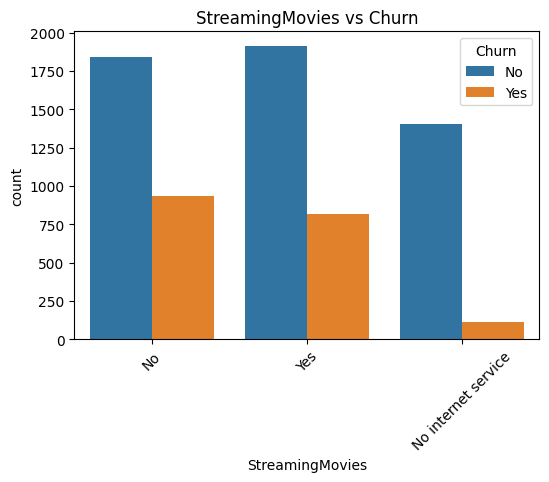

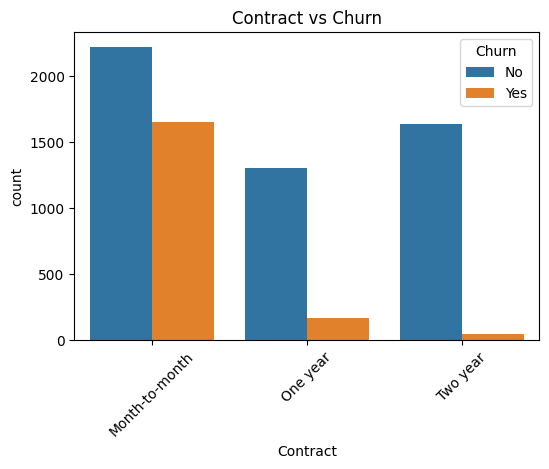

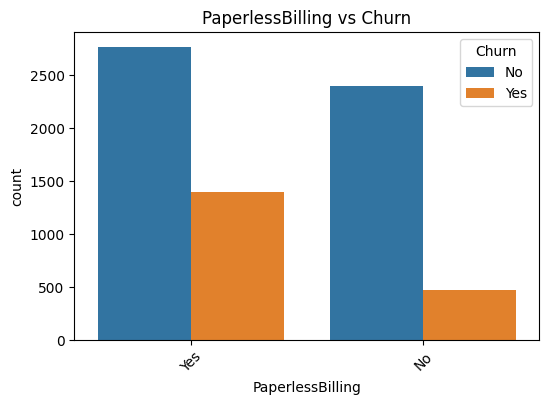

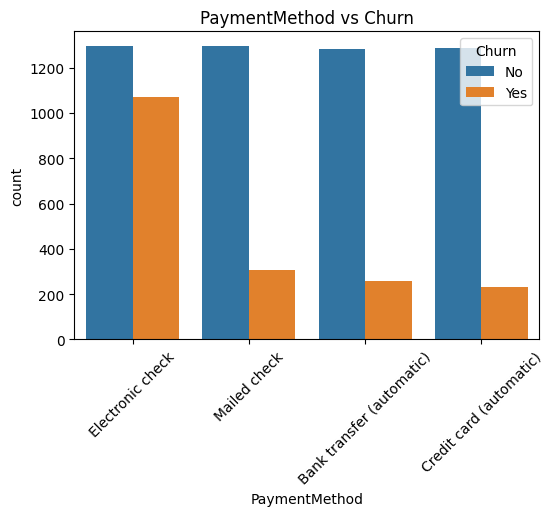

In [72]:
cat_features = df.select_dtypes(include='object').columns.tolist()
cat_features.remove('Churn')  # remove churn column

# Categorical features vs churn plots
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

####**Assuption Check for Linear Regression**

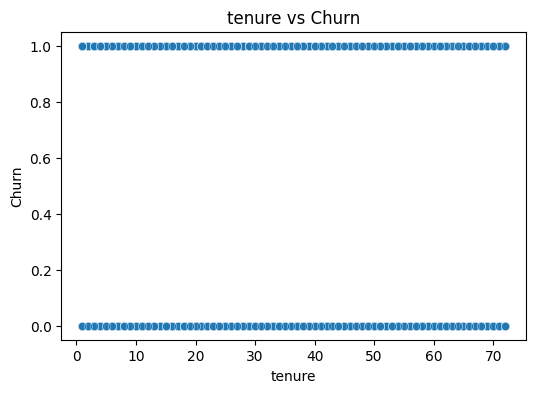

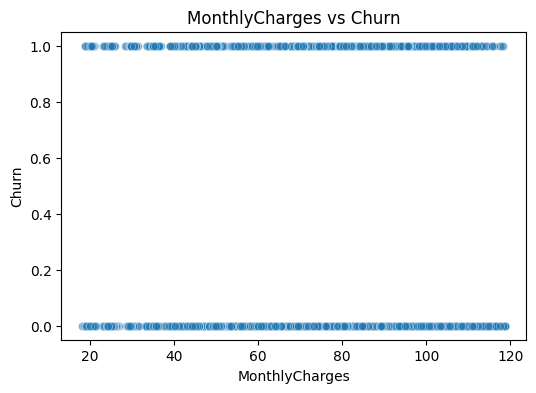

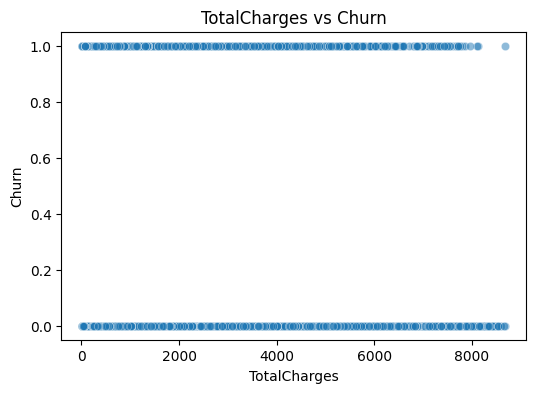

In [73]:
# Scatter plots for numerical features vs churn
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert churn to numeric
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Churn_numeric', alpha=0.5)
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Churn')
    plt.show()

####The scatter plots show two distinct lines of points because the target, or the churn, is binary. Because of this, the scatter plots do not follow a normal distribution. This demonstrates that linear regression is a poor model choice for this dataset.

####**Assumption Check for Logistic Regression**

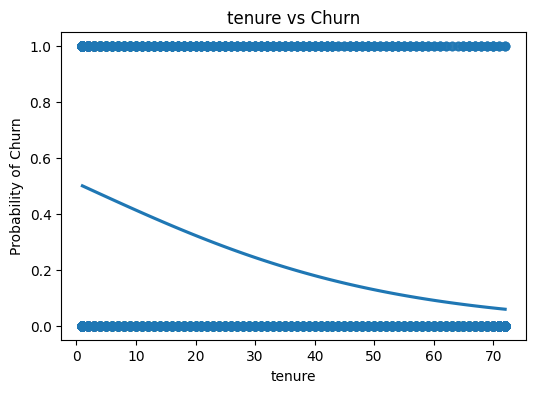

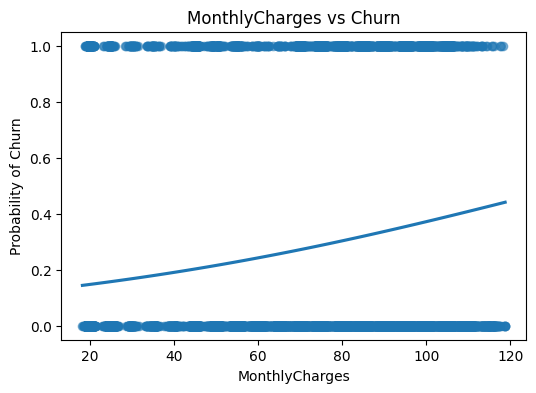

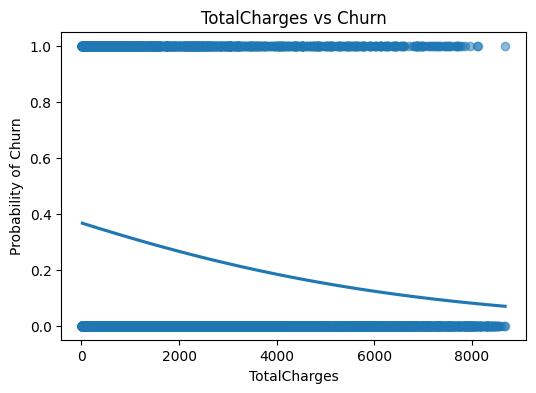

In [74]:
# Log-odds for numerical features
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=col, y='Churn_numeric', logistic=True, ci=None, scatter_kws={'alpha':0.5})
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Probability of Churn')
    plt.show()

####The tunure and TotalCharges plots show a clear non linear relationship with churn. MontlyCharges is closer to linear but still has a mild curvature. This shows that logistic regression does not perfectly satisfy the assumption of linearity in the logit and therefore is not the right model for this dataset.

####**Assumption Check for GAM**

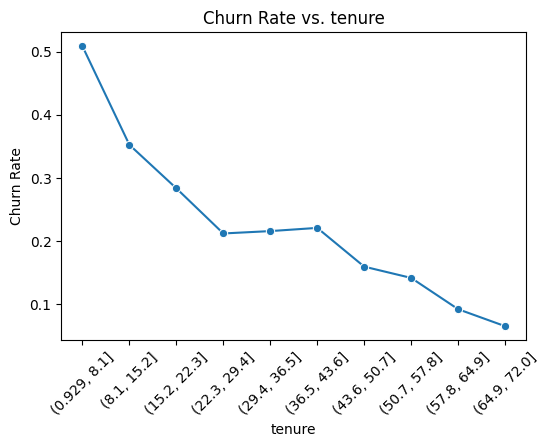

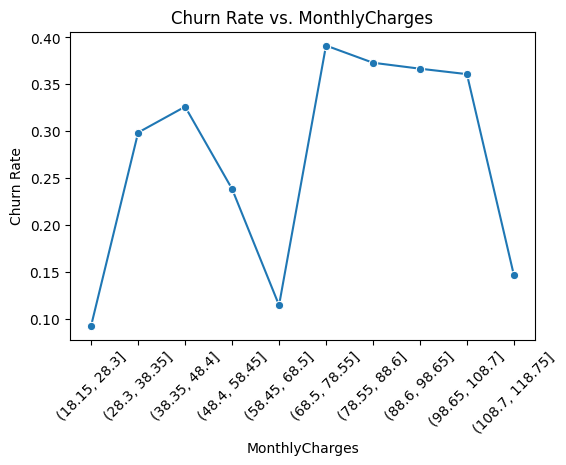

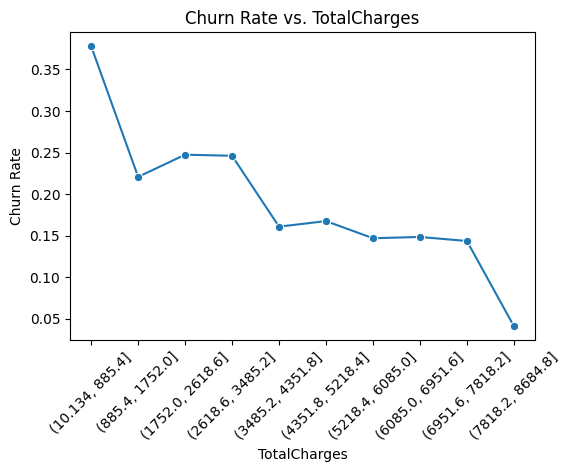

In [75]:
for feature in numerical_features:
    # Bin the numerical feature and calculate the churn rate for each bin
    binned_df = df.groupby(pd.cut(df[feature], bins=10), observed=True)['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()

    # Convert the binned column to a string for plotting
    binned_df[feature] = binned_df[feature].astype(str)

    # Create the line plot
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=feature, y='Churn', data=binned_df, marker='o')
    plt.title(f'Churn Rate vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


####

####The graphs for tenure and TotalCharges depict a non-linear relationship where the churn rate changes at different rates and they drop sharply before flattening out. The MonthlyCharges graph shows an even more complex rlationship woth multiple highs and lows that could not be represented by a linear model. These plots show that a GAM model is a good fit for the dataset.

##**2. Linear Regression**
Treat the churn variable as a continuous variable (e.g., O for staying, 1 for churning) and build a linear regression model to predict churn.
Interpret the coefficients and assess the model's performance.


In [76]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Churn', axis=1) # DEfine features
y = df_encoded['Churn'] # Define target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Makre predictions

mse = mean_squared_error(y_test, y_pred) # Calculate error
print("Mean Squared Error:", round(mse, 4))

r2 = r2_score(y_test, y_pred) # Calculate R2 score
print("R^2 Score:", round(r2, 4))

# Coefficients
coeffs = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coeffs)

Mean Squared Error: 0.0
R^2 Score: 1.0
                                  Feature   Coefficient
0                           SeniorCitizen -3.174351e-16
1                                  tenure -4.153036e-16
2                          MonthlyCharges -1.935950e-16
3                            TotalCharges  5.574652e-18
4                           Churn_numeric  1.000000e+00
5                             gender_Male  1.271920e-16
6                             Partner_Yes  7.020344e-17
7                          Dependents_Yes -7.140803e-16
8                        PhoneService_Yes -1.303607e-15
9          MultipleLines_No phone service  1.151068e-15
10                      MultipleLines_Yes -6.742753e-16
11            InternetService_Fiber optic -1.789141e-15
12                     InternetService_No -2.920413e-16
13     OnlineSecurity_No internet service -2.399996e-16
14                     OnlineSecurity_Yes  4.498351e-16
15       OnlineBackup_No internet service -3.926552e-16
16       

####The MSE for this model is 0.1459 which means there is relatively decent prediction accuracy. The R^2 score is 0.2522 which means the model explains about 25% of the variance in churn which is low predictive power because there is 75% of varaince unexplained.

####Based on the coefficient values, the strongest predictors of being more likely to churn are InternetService_Fiber optic (customers with fiber optic), StreamMovies_yes (customers who are subscribed to streaming services), PaymentMethod_Electronic check (customers who pay with check), and SeniorCitizen (customers who are older). The predictors that reduce the liklihood of churning are Contract_One year and Contract_Two year (customers with longer-term contracts), TechSupport_Yes (customers with tech support), and OnlineSecurity_Yes (customers with security services). TotalCharges, tenure, and MonthlyCharges have incredibly small coefficients which means they do not contribute significantly to predicting churn with this model.

####These results show that linear regression is not a great model for making predictions about churn, likely due to the model not being well suited for binary classification.

##**3. Logistic Regression**
Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.


In [79]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Churn', axis=1) # Define features
y = df_encoded['Churn'] # Define target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1] # Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print("Accuracy:", round(accuracy, 4))

roc = roc_auc_score(y_test, y_pred_proba) # Calculate ROC-AUC
print("ROC-AUC:", round(roc, 4))

classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_report)

# Coefficients
coeffs = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_[0]})
print(coeffs)

Accuracy: 0.7875
ROC-AUC: 0.8321

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

                                  Feature  Coefficient
0                           SeniorCitizen     0.258251
1                                  tenure    -0.060795
2                          MonthlyCharges     0.004207
3                            TotalCharges     0.000327
4                             gender_Male    -0.031949
5                             Partner_Yes     0.051264
6                          Dependents_Yes    -0.214941
7                        PhoneService_Yes    -0.442127
8          MultipleLines_No phone service     0.264738
9                       MultipleLines_Yes     0.196662
10        

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####The accuraacy score is 0.7875 which means the model correctly classifies about 79% of the customers. The ROC-AUC score is 0.8321 which means it has a pretty good ability to classify people who do not churn, The recall scores show the model is biased towards the majorty class of customers who do not churn and misses almost half of customers who churn.

####Based on the coefficient values, the predictors that indicate an increase in churn risk are the same ones as with linear regression with the addition of Streaming_TV_Yes (customers with the tv add on), MultipleLines (customers who have multiple lines), and PaperlessBilling_Yes (customers with paperless billing enabled). The predictors that reduce the churn risk are also the same as linear regression with the addition of PhoneService_Yes (customers who have phone services enabled) and Dependents_Yes (customers who have dependents). Both TotalCharges and MonthlyCharges have nearly zero effect predicting churn with this model due to their small coefficients.

####The logistic regression model performs better than the linear regression model but there is a significant class imbalance issue

##**4. Generalized Additive Model (GAM)**
Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

## **5. Model Comparison**
Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.